In [1]:
import torch
from ultralytics import YOLO
import os
import random
from shutil import copyfile
import pickle

def split_dataset(dataset_dir, train_dir, val_dir, test_dir, split_ratio=(0.75, 0.15, 0.10), shuffle=True):
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    def copy_images_and_labels(image_list, src_dir, dest_dir):
        for img in image_list:
            image_src = os.path.join(src_dir, "images", img)
            label_src = os.path.join(
                src_dir, "labels", os.path.splitext(img)[0] + ".txt")
            os.makedirs(os.path.join(dest_dir, "images"), exist_ok=True)
            os.makedirs(os.path.join(dest_dir, "labels"), exist_ok=True)
            copyfile(image_src, os.path.join(dest_dir, "images", img))
            copyfile(label_src, os.path.join(
                dest_dir, "labels", os.path.splitext(img)[0] + ".txt"))

    images = os.listdir(os.path.join(dataset_dir, "images"))
    num_images = len(images)

    if shuffle:
        random.shuffle(images)

    num_train = int(num_images * split_ratio[0])
    num_val = int(num_images * split_ratio[1])

    train_images = images[:num_train]
    val_images = images[num_train:num_train + num_val]
    test_images = images[num_train + num_val:]

    copy_images_and_labels(train_images, dataset_dir, train_dir)
    copy_images_and_labels(val_images, dataset_dir, val_dir)
    copy_images_and_labels(test_images, dataset_dir, test_dir)


dataset_dir = "train"
train_dir = "train/training"
val_dir = "train/val"
test_dir = "train/test"

split_dataset(dataset_dir, train_dir, val_dir, test_dir)

In [2]:
my_model = YOLO('yolov8n.pt')

In [3]:
my_model.train(data='data.yaml', epochs=20, batch=4, amp=True)

Ultralytics YOLOv8.2.25  Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=20, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

C:\Users\auzag\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed 


train: Scanning C:\Users\auzag\Desktop\U7\vision\train\training\labels.cache... 3804 images, 7 backgrounds, 0 corrupt: 

WARNING  Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 8659. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\auzag\Desktop\U7\vision\train\val\labels.cache... 760 images, 1 backgrounds, 0 corrupt: 100%|███


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20     0.747G      1.108      1.377      1.278         15        640: 100%|██████████| 951/951 [05:30<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:17

                   all        760       1718      0.786      0.344      0.341      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20     0.728G      1.129      0.994      1.279         24        640: 100%|██████████| 951/951 [05:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:17

                   all        760       1718      0.855      0.353      0.361      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20     0.726G      1.134     0.9176      1.274          9        640: 100%|██████████| 951/951 [05:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:17

                   all        760       1718      0.838      0.349      0.368      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20     0.724G      1.117     0.8711      1.271         13        640: 100%|██████████| 951/951 [05:16<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:17

                   all        760       1718      0.813      0.353      0.381      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20     0.724G      1.075     0.8072       1.24         19        640: 100%|██████████| 951/951 [05:14<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:17

                   all        760       1718      0.857      0.361      0.383      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20     0.724G      1.046     0.7697       1.22         16        640: 100%|██████████| 951/951 [05:09<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:16

                   all        760       1718      0.854      0.358      0.381      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20     0.724G      1.035     0.7385      1.218         20        640: 100%|██████████| 951/951 [05:11<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:16

                   all        760       1718      0.876      0.354      0.385      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20     0.726G      1.007     0.7109      1.195         27        640: 100%|██████████| 951/951 [05:13<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:17

                   all        760       1718       0.88      0.355      0.399      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20     0.724G     0.9775     0.6788      1.176         17        640: 100%|██████████| 951/951 [05:15<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:16

                   all        760       1718      0.885      0.359      0.397      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20     0.724G     0.9693     0.6551       1.17         24        640: 100%|██████████| 951/951 [05:14<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:16

                   all        760       1718      0.878      0.361      0.388      0.286


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20     0.724G     0.9432     0.5875      1.155          9        640: 100%|██████████| 951/951 [05:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:16

                   all        760       1718      0.851      0.364      0.418      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20     0.724G     0.9217     0.5687       1.13          7        640: 100%|██████████| 951/951 [05:15<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:17

                   all        760       1718      0.906       0.36      0.412      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20     0.724G     0.9032     0.5454      1.121         14        640: 100%|██████████| 951/951 [05:31<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:17

                   all        760       1718      0.929      0.357      0.426      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20     0.724G     0.8888     0.5309      1.111          8        640: 100%|██████████| 951/951 [05:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:17

                   all        760       1718      0.883      0.366      0.431      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20     0.724G     0.8738     0.5122      1.099          8        640: 100%|██████████| 951/951 [05:29<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:17

                   all        760       1718      0.885      0.366      0.426      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20     0.724G     0.8638     0.4983      1.093         10        640: 100%|██████████| 951/951 [05:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:17

                   all        760       1718      0.913      0.363      0.437       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20     0.724G     0.8437     0.4806      1.078         11        640: 100%|██████████| 951/951 [05:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:17

                   all        760       1718      0.901      0.364      0.434      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20     0.724G      0.835     0.4665      1.073          8        640: 100%|██████████| 951/951 [05:28<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:16

                   all        760       1718       0.91      0.365      0.433      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20     0.724G     0.8179     0.4519      1.063         11        640: 100%|██████████| 951/951 [05:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:17

                   all        760       1718      0.924      0.364       0.44      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20     0.724G     0.8108     0.4435       1.05          8        640: 100%|██████████| 951/951 [05:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:17

                   all        760       1718      0.933      0.364      0.443      0.355



20 epochs completed in 1.893 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 6.2MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics YOLOv8.2.25  Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:15


                   all        760       1718      0.933      0.364      0.443      0.355
                  Auto        760        883      0.933      0.366      0.453      0.398
                 Placa        760        835      0.934      0.363      0.434      0.311
Speed: 0.2ms preprocess, 15.8ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000026D96A20C20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [8]:
results = my_model('tests/test2.png')


image 1/1 C:\Users\auzag\Desktop\U7\vision\tests\test2.png: 480x640 2 Autos, 1 Placa, 63.4ms
Speed: 5.0ms preprocess, 63.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


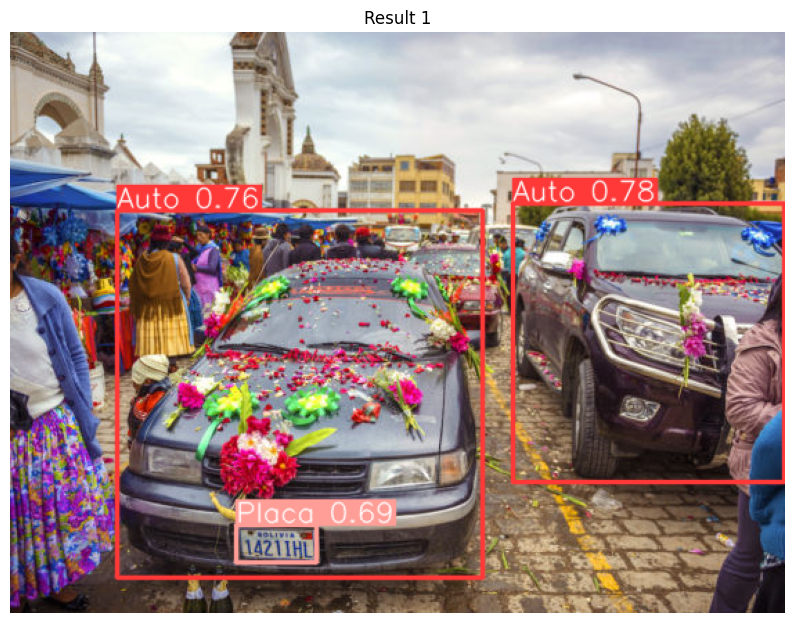

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
for i, r in enumerate(results):
    # Get the image with bounding boxes from the result
    im_bgr = r.plot()

    # Convert BGR to RGB for displaying with matplotlib
    im_rgb = im_bgr[..., ::-1]

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(im_rgb)
    plt.axis('off')  # Hide the axis
    plt.title(f"Result {i+1}")
    plt.show()

In [ ]:
my_model.export();

Ultralytics YOLOv8.2.25  Python-3.12.3 torch-2.3.0+cu121 CPU (Intel Core(TM) i7-9750H 2.60GHz)

PyTorch: starting from 'runs\detect\train4\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (5.9 MB)
